In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animate
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg' # Add the path of ffmpeg here!!

%matplotlib inline

Writer = animate.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

import logging
logger = logging.getLogger('matplotlib.animation')
logger.setLevel(logging.DEBUG)

In [29]:
def magnetization(lattice):
    '''It determines the magnetization'''
    global L
    return np.sum(lattice)/L

In [30]:
def metropolis(change_E,y,x,lattice):
    '''It decides to flip the state using the Metropolis formula'''
    global k_B
    global T
    r = np.random.random()
    if r < np.exp(change_E/(k_B*T)):
        lattice[y,x] = -lattice[y,x]
    #note that if change_E>=0, r is always < np.exp(change_E/(k_B*T))
    return lattice

In [34]:
def deltaEnergy(y,x,h):
    '''It calculates the change in energy after flipping a random state.'''
    global L
    global J
    # periodic lattice
    per = np.empty([L+2,L+2],dtype=int) 
    per[1:L+1,1:L+1] = lattice
    per[0,1:L+1] = lattice[L-1]
    per[L+1,1:L+1] = lattice[0]
    per[1:L+1,0] = lattice[:,L-1]
    per[1:L+1,L+1] = lattice[:,0]

    X = x+1
    Y = y+1
    S_j = per[Y-1,X]+per[Y+1,X]+per[Y,X+1]+per[Y,X-1]
    h_i = J*S_j + h
    
    return -2*lattice[y,x]*h_i

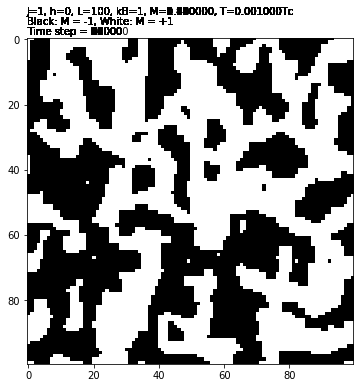

In [35]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ims = []

J = 1. # interaction constant
h = np.random.choice([-1,0,1])
L = 100
k_B = 1.
#T = 2.269 * J/k_B *0.1 #Tc = 2.269
T = 2.269 * 0.001
#ferromagnetic - less than critical temp
#paramagnetic - greater than critical temp
iterate = 100000 # number of iterations
lattice = np.random.choice([1,-1],size=[L,L])
magnetizations = []
for i in range(iterate + 1):
    y,x = np.random.randint(L),np.random.randint(L)
    change_E = deltaEnergy(y,x,h)
    lattice = metropolis(change_E,y,x,lattice)
    
    magnet = magnetization(lattice)
    magnetizations.append(magnet)
    if i%1000 == 0:
        im  = ax.imshow(lattice,cmap='gray',interpolation="nearest",animated=True)
        im2 = ax.annotate('J=%d, h=%d, L=%d, kB=%d, M=%2f, T=%fTc'%(J,h,L,k_B,magnet,T/2.269), xy=(-0.5,-7.5),
                         xycoords='data', annotation_clip=False)
        im3 = ax.annotate('Black: M = -1, White: M = +1', xy=(-0.5,-4.5),
                         xycoords='data', annotation_clip=False)
        im4 = ax.annotate('Time step = %d'%(i), xy=(-0.5,-1.5),
                         xycoords='data', annotation_clip=False)
        ims.append([im,im2,im3,im4])

In [36]:
ani = animate.ArtistAnimation(fig, ims, interval=150, blit=True)
HTML(ani.to_html5_video())

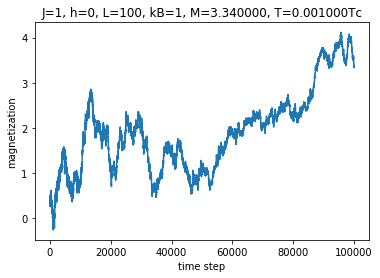

In [37]:
plt.plot(np.arange(0,iterate + 1),magnetizations)
plt.xlabel('time step')
plt.ylabel('magnetization')
plt.title('J=%d, h=%d, L=%d, kB=%d, M=%2f, T=%fTc'%(J,h,L,k_B,magnet,T/2.269))
plt.show()

h = 0: H(S) = H(-S); spontaneous symmetry breaking, energy is symmetric in M
h != 0: destroys the symmetry

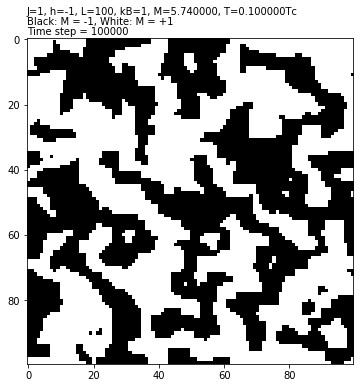

In [41]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ims = []

J = 1 # interaction constant
#h = 0
L = 100
k_B = 1
#T = 2.269 * 0.10
T = 2.269 * 0.10

#ferromagnetic - less than critical temp
#paramagnetic - greater than critical temp
iterate = 100000 # number of iterations
lattice = np.random.choice([1,-1],size=[L,L])
for i in range(iterate + 1):
    h = np.random.choice([-1,0,1])
    y,x = np.random.randint(L),np.random.randint(L)
    change_E = deltaEnergy(y,x,h)
    lattice = metropolis(change_E,y,x,lattice)
    
    if i%1000 == 0:
        im  = ax.imshow(lattice,cmap='gray',interpolation="nearest",animated=True)
        im2 = ax.annotate('J=%d, h=%d, L=%d, kB=%d, M=%2f, T=%fTc'%(J,h,L,k_B,magnetization(lattice),T/2.269), xy=(-0.5,-7.5),
                         xycoords='data', annotation_clip=False)
        im3 = ax.annotate('Black: M = -1, White: M = +1', xy=(-0.5,-4.5),
                         xycoords='data', annotation_clip=False)
        im4 = ax.annotate('Time step = %d'%(i), xy=(-0.5,-1.5),
                         xycoords='data', annotation_clip=False)
        ims.append([im,im2,im3,im4])
    
ani = animate.ArtistAnimation(fig, ims, interval=150, blit=True)
HTML(ani.to_html5_video())